# Preprocessing for the Heart data
Found these sources:<br>
<li>https://medium.com/@engr_faizan_ml/bio-medical-imaging-preprocessing-and-augmentation-for-abnormality-detection-4cfb2646bbc4 (Preprocessing for MRI data) </li>
<li>https://www.kaggle.com/code/semivalich/unetr (example Code)</li>
<li>https://towardsdatascience.com/medical-image-pre-processing-with-python-d07694852606 (Preprocessing for CT scans)</li>

Image shape: (320, 320, 130)
Metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 320 320 130   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z     

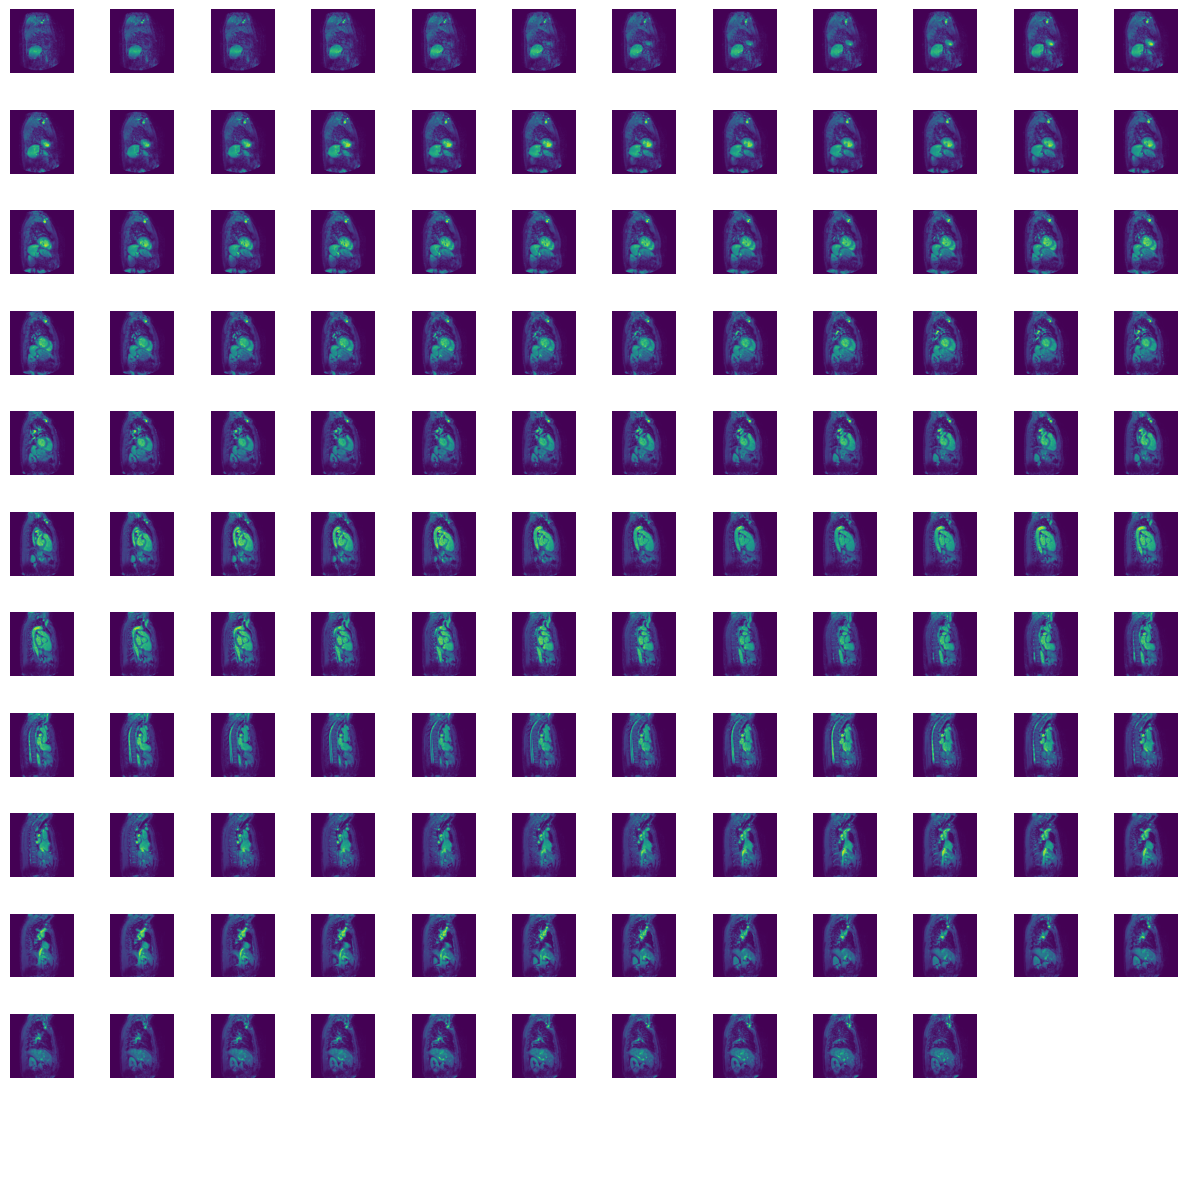

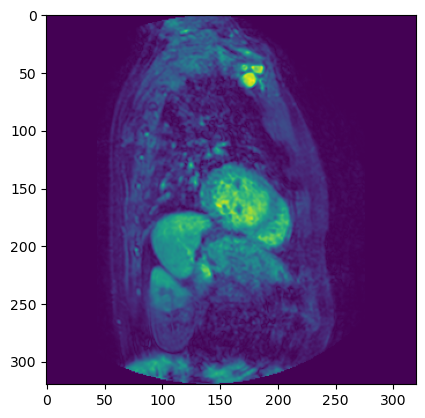

In [9]:
import matplotlib.pyplot as plt
import os
from Data_import import load_image
import numpy as np
from monai.transforms import (
                             LoadImaged,
                             Orientationd,
                             EnsureChannelFirstd,
                             Spacingd,
                             RandAffined,
                             Rand3DElasticd,
                             Compose,)
from utils import showResultTransformations

# Loading the data

In [10]:
DATA_DIR = "Data\Task02_Heart"
TRAIN_IMAGES = "imagesTr"
TRAIN_LABELS ="labelsTr"
TEST_IMAGES = "imagesTs"

train_images = sorted(os.listdir(os.path.join(DATA_DIR, TRAIN_IMAGES)))
train_labels = sorted(os.listdir(os.path.join(DATA_DIR, TRAIN_LABELS)))
data_dicts = [{"image": os.path.join(DATA_DIR, TRAIN_IMAGES ,image_name), "label": os.path.join(DATA_DIR, TRAIN_LABELS, label_name)} for image_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-4], data_dicts[-4:] # 16 train and 4 validation

In [11]:
# load image
tr_img_001, tr_data_001 = load_image(data_dicts[0]["image"])
tr_img_002, tr_data_002 = load_image(data_dicts[1]["image"])
# load label
label_img_001, label_data_001 = load_image(data_dicts[0]["label"])
label_img_002, label_data_002 = load_image(data_dicts[1]["label"])

Image shape: (320, 320, 130)
Metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 320 320 130   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z     

Type of data: <class 'numpy.ndarray'>, datatype of image entries: float64
Min = 0.0, Max = 1999.0, Mean = 172.74059968449518, STD = 263.3350437349292
Random value in modality: 58.0


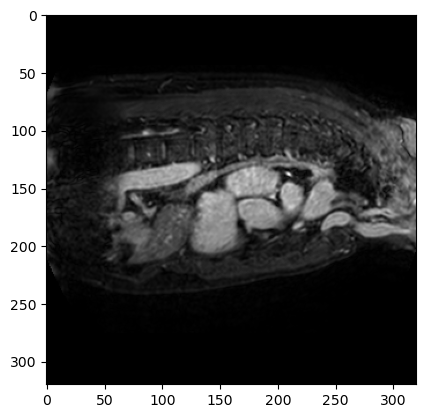

In [12]:
# check other attributes of the neuroimage
min_value = np.min(tr_data_001) # minimum value 
max_value = np.max(tr_data_001) # maximum value
mean_value = np.mean(tr_data_001) # mean value
std = np.std(tr_data_001)  # standard deviation if useful
print(f'Type of data: {type(tr_data_001)}, datatype of image entries: {tr_data_001.dtype}')
print(f'Min = {min_value}, Max = {max_value}, Mean = {mean_value}, STD = {std}')
print(f'Random value in modality: {tr_data_001[70, 80, 90]}') # check a random value in the modality
plt.imshow(tr_data_001[:, :, 80], cmap = 'gray') # show a slice

Type of data: <class 'numpy.ndarray'>, datatype of image entries: float64
Min = 0.0, Max = 1811.0, Mean = 140.07046031605114, STD = 232.39553914260085
Random value in modality: 137.0


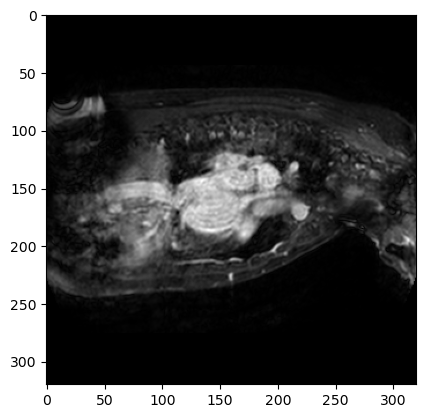

In [13]:
# check other attributes of the neuroimage
min_value = np.min(tr_data_002) # minimum value 
max_value = np.max(tr_data_002) # maximum value
mean_value = np.mean(tr_data_002) # mean value
std = np.std(tr_data_002)  # standard deviation if useful
print(f'Type of data: {type(tr_data_002)}, datatype of image entries: {tr_data_002.dtype}')
print(f'Min = {min_value}, Max = {max_value}, Mean = {mean_value}, STD = {std}')
print(f'Random value in modality: {tr_data_002[70, 80, 90]}') # check a random value in the modality
plt.imshow(tr_data_002[:, :, 80], cmap = 'gray') # show a slice

# Preprocessing
For preprocessing MONAI (Medical open network for artificial intelligence) transforms is used, which is an open-source framework for  accelerating research and development in medical imaging. (https://monai.io/) Looks very interesting!

In [14]:
# only one image and label is loaded here
loader = LoadImaged(keys = ("image", "label"), image_only = True)
data_dict = loader(train_files[0])
data_dict2 = loader(train_files[10])

In [15]:
print("Image 1:")
print(f"image shape: {data_dict['image'].shape}")
print(f"label shape: {data_dict['label'].shape}")
print(f"image pixdim:\n{data_dict['image'].pixdim}")
print("Image 2:")
print(f"image shape: {data_dict2['image'].shape}")
print(f"label shape: {data_dict2['label'].shape}")
print(f"image pixdim:\n{data_dict2['image'].pixdim}")

Image 1:
image shape: torch.Size([320, 320, 130])
label shape: torch.Size([320, 320, 130])
image pixdim:
tensor([1.2500, 1.2500, 1.3700], dtype=torch.float64)
Image 2:
image shape: torch.Size([320, 320, 122])
label shape: torch.Size([320, 320, 122])
image pixdim:
tensor([1.2500, 1.2500, 1.3700], dtype=torch.float64)


### Putting the channel first

In [16]:
#ensure that the dataset has channel first input
ensure_channel_first = EnsureChannelFirstd(keys=["image", "label"])
cf_data_dict = ensure_channel_first(data_dict)
print(f"image shape: {data_dict['image'].shape}")

image shape: torch.Size([320, 320, 130])


### Ensuring the right orientation
I don't understand yet why this is needed

In [17]:
# adding orientation transform
orientated = Orientationd(keys = ("image", "label"), axcodes = "PLI")
or_data_dict = orientated(cf_data_dict)
print(f"image shape: {or_data_dict['image'].shape}")
print(f"label shape: {or_data_dict['label'].shape}")
print(f"image pixdim:\n{or_data_dict['image'].pixdim}")

image shape: torch.Size([1, 320, 320, 130])
label shape: torch.Size([1, 320, 320, 130])
image pixdim:
tensor([1.2500, 1.2500, 1.3700], dtype=torch.float64)


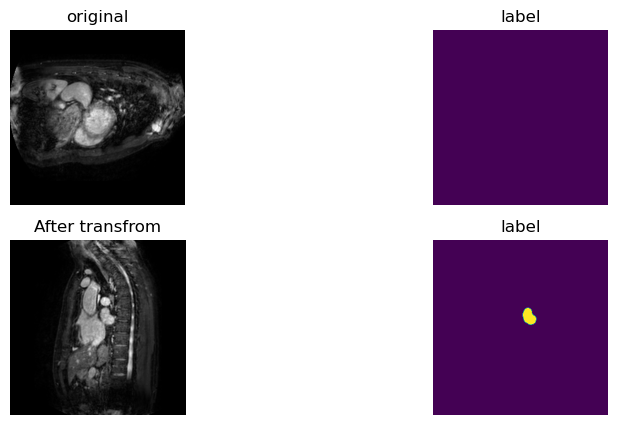

In [18]:
# visualization of the changes
showResultTransformations(cf_data_dict, or_data_dict)

### Resampling to a constant voxel size
Also here I am not sure yet why different Voxel sizes are a problem and what this is actually doing. 

In [19]:
spacing = Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 5.0), mode=("bilinear", "nearest"))
output_dict = spacing(or_data_dict) # see cf_data_dict in the above code
print(f"Before image pixdim: {data_dict['image'].pixdim}")
print(f"Before label pixdim: {data_dict['label'].pixdim}")
print(f"Before image shape: {data_dict['image'].shape}")
print(f"Before label shape: {data_dict['label'].shape}")
print(f"After image pixdim: {output_dict['image'].pixdim}")
print(f"After label pixdim: {output_dict['label'].pixdim}")
print(f"After image shape: {output_dict['image'].shape}")
print(f"After label shape: {output_dict['label'].shape}")

Before image pixdim: tensor([1.2500, 1.2500, 1.3700], dtype=torch.float64)
Before label pixdim: tensor([1.2500, 1.2500, 1.3700], dtype=torch.float64)
Before image shape: torch.Size([320, 320, 130])
Before label shape: torch.Size([320, 320, 130])
After image pixdim: tensor([1.5000, 1.5000, 5.0000], dtype=torch.float64)
After label pixdim: tensor([1.5000, 1.5000, 5.0000], dtype=torch.float64)
After image shape: torch.Size([1, 267, 267, 36])
After label shape: torch.Size([1, 267, 267, 36])


### Random Affine Transformation
Combines skewing, translation, rotation, and scaling. This is useful for data augmentation. 

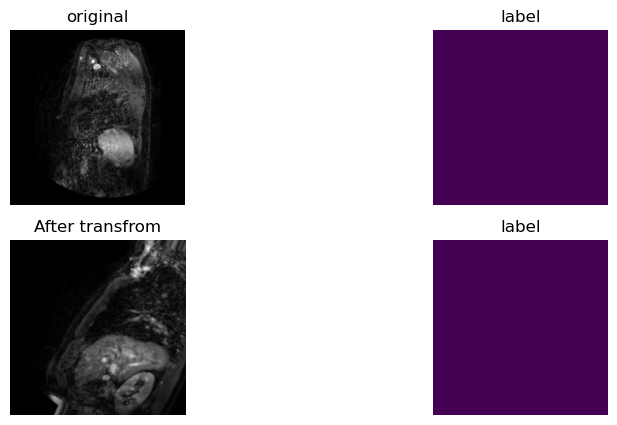

In [20]:
# adding affine transform
rand_affine = RandAffined(
     keys = ["image", "label"],
     mode = ("bilinear", "nearest"),
     prob = 1.0,
     spatial_size = (240, 240, 155),
     translate_range = (40, 40, 2),
     rotate_range = (np.pi/36, np.pi/36, np.pi/4),
     scale_range = (0.15, 0.15, 0.15),
     padding_mode = 'border')
rand_affine.set_random_state(seed = 123)
affined_data_dict = rand_affine(output_dict)
af_image, af_label = affined_data_dict["image"], affined_data_dict["label"]
# visualization TODO fix bug
showResultTransformations(output_dict, affined_data_dict)

### Random Elastic Deformation
This is also good for data augmentation

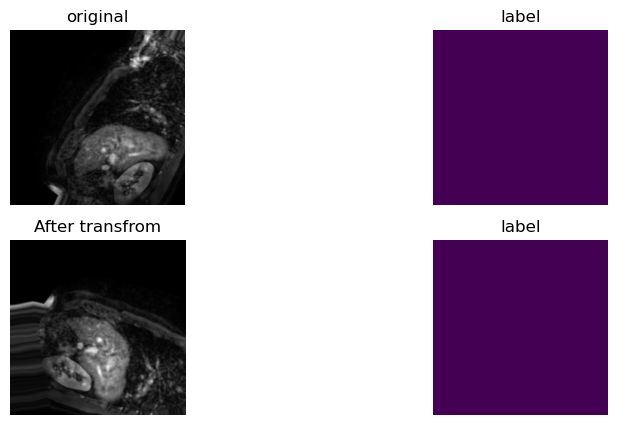

In [21]:
# adding random elastic transform
rand_elastic = Rand3DElasticd(
    keys=["image", "label"],
    mode=("bilinear", "nearest"),
    prob=1.0,
    sigma_range=(5, 8),
    magnitude_range=(100, 200),
    spatial_size=(240, 240, 155),
    translate_range=(50, 50, 2),
    rotate_range=(np.pi / 36, np.pi / 36, np.pi),
    scale_range=(0.15, 0.15, 0.15),
    padding_mode="border",
)
rand_elastic.set_random_state(seed=123)
elastic_data_dict = rand_elastic(affined_data_dict)
elastic_image, elastic_label= elastic_data_dict["image"], elastic_data_dict["label"]
# visualization
showResultTransformations(affined_data_dict, elastic_data_dict)


### Put all transformations together using compose

In [22]:
transforms = Compose(
    [EnsureChannelFirstd(keys=["image", "label"]),
     Orientationd(keys = ("image", "label"), axcodes = "PLI"),
     Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 5.0), mode=("bilinear", "nearest")),
     RandAffined(
        keys = ["image", "label"],
        mode = ("bilinear", "nearest"),
        prob = 1.0,
        spatial_size = (240, 240, 155),
        translate_range = (40, 40, 2),
        rotate_range = (np.pi/36, np.pi/36, np.pi/4),
        scale_range = (0.15, 0.15, 0.15),
        padding_mode = 'border'),
    Rand3DElasticd(
        keys=["image", "label"],
        mode=("bilinear", "nearest"),
        prob=1.0,
        sigma_range=(5, 8),
        magnitude_range=(100, 200),
        spatial_size=(240, 240, 155),
        translate_range=(50, 50, 2),
        rotate_range=(np.pi / 36, np.pi / 36, np.pi),
        scale_range=(0.15, 0.15, 0.15),
        padding_mode="border",),
        
        ]
)

In [23]:
loader = LoadImaged(keys = ("image", "label"), image_only = True)
data_dict = loader(train_files[0])

transformed_data = transforms(data_dict)
